<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


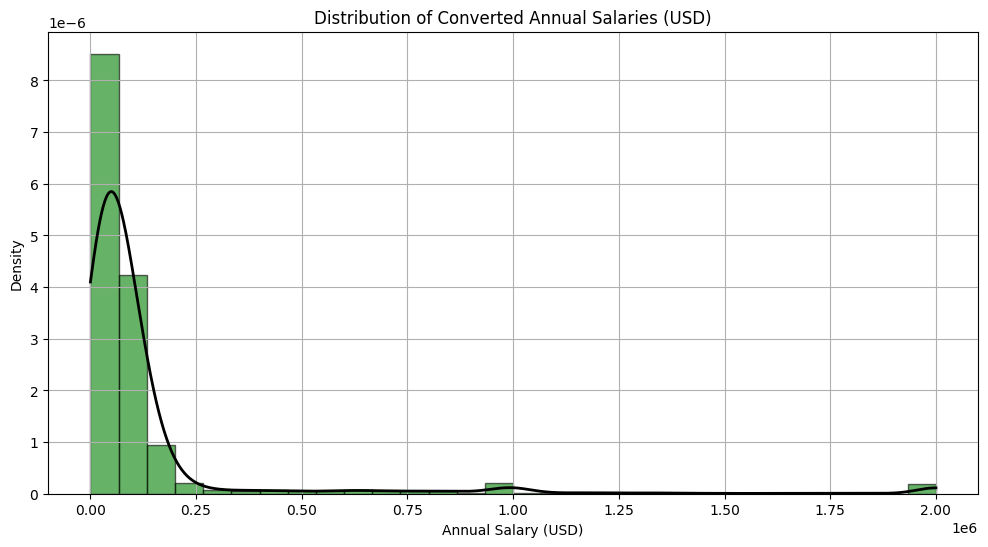

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Drop rows where 'ConvertedComp' is missing
df_clean = df.dropna(subset=['ConvertedComp'])

# Extract the 'ConvertedComp' column
salaries = df_clean['ConvertedComp']

# Plot histogram
plt.figure(figsize=(12, 6))
count, bins, ignored = plt.hist(salaries, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Calculate KDE
kde = gaussian_kde(salaries, bw_method='scott')  # bw_method can be adjusted for smoother or rougher KDE
x = np.linspace(salaries.min(), salaries.max(), 1000)
kde_values = kde(x)

# Plot KDE
plt.plot(x, kde_values, color='k', linewidth=2)

# Add titles and labels
plt.title('Distribution of Converted Annual Salaries (USD)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.grid(True)

# Show plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


In [ ]:
# your code goes here
# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(salaries, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Converted Annual Salaries (USD)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [ ]:
# your code goes here

# Calculate the median of the 'ConvertedComp' column
median_salary = df_clean['ConvertedComp'].median()

print(f'The median of the ConvertedComp column is: {median_salary}')


How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here
# Adjust the condition if there are multiple values or variations
male_responders = df_clean[df_clean['Gender'] == 'Man']

# Count the number of such responders
number_of_male_responders = male_responders.shape[0]

print(f'The number of responders who identified themselves only as a Man is: {number_of_male_responders}')

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here
# Assuming the column 'Gender' contains values like 'Woman', 'Man', etc.
female_responders = df_clean[df_clean['Gender'] == 'Woman']


# Calculate the median of 'ConvertedComp'
median_salary_female = female_responders['ConvertedComp'].median()

print(f'The median of ConvertedComp for responders who identified themselves only as a Woman is: {median_salary_female}')


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [ ]:
# your code goes here
# Calculate the five-number summary
min_age = df_clean['Age'].min()
q1_age = df_clean['Age'].quantile(0.25)
median_age = df_clean['Age'].median()
q3_age = df_clean['Age'].quantile(0.75)
max_age = df_clean['Age'].max()

print(f'Five-number summary for the Age column:')
print(f'Minimum: {min_age}')
print(f'Q1 (25th percentile): {q1_age}')
print(f'Median (50th percentile): {median_age}')
print(f'Q3 (75th percentile): {q3_age}')
print(f'Maximum: {max_age}')

Plot a histogram of the column `Age`.


In [ ]:
# your code goes here
# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(df_clean['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [ ]:
# your code goes here
# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_clean['ConvertedComp'], vert=False, patch_artist=True)
plt.title('Box Plot of Converted Annual Salaries (USD)')
plt.xlabel('Annual Salary (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
# your code goes here
# Calculate the first and third quartiles
q1 = df_clean['ConvertedComp'].quantile(0.25)
q3 = df_clean['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

print(f'The Interquartile Range (IQR) for the ConvertedComp column is: {iqr}')

Find out the upper and lower bounds.


In [ ]:
# your code goes here
# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'The lower bound for outliers is: {lower_bound}')
print(f'The upper bound for outliers is: {upper_bound}')

Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# your code goes here
# Identify outliers
outliers = df_clean[(df_clean['ConvertedComp'] < lower_bound) | (df_clean['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f'The number of outliers in the ConvertedComp column is: {num_outliers}')

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here
# Create a new DataFrame by removing the outliers
df_no_outliers = df_clean[(df_clean['ConvertedComp'] >= lower_bound) & (df_clean['ConvertedComp'] <= upper_bound)]
df_no_outliers.head()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here
# Select numerical columns
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df_clean[numerical_cols].corr()

# Extract correlation with 'Age'
correlation_with_age = correlation_matrix['Age'].sort_values(ascending=False)

print("Correlation of 'Age' with all other numerical columns:")
print(correlation_with_age)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
